## **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**


In [31]:
!pip install proplot
!pip install kmodes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [32]:
# # Kết nối Google Drive
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount = True)
# folder = '/content/gdrive/MyDrive/Colab Notebooks'

#PHÂN TÍCH THĂM DÒ

In [33]:
# Tập dữ liệu
df = pd.read_csv('marketing_campaign.csv',delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
df.describe() #Tạo bảng tóm tắt thống kê

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [35]:
# Kiểm tra có dữ liệu bị thiếu hay không
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

##Biểu đồ phân bố

(2216,) (2216,) (2216,)


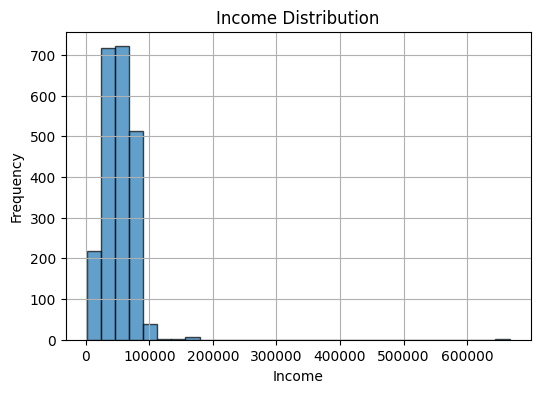

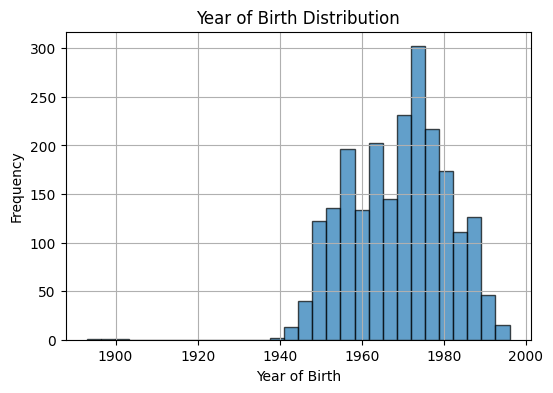

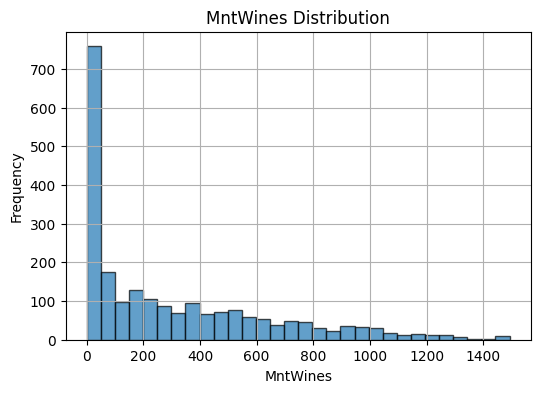

In [36]:
# Loại bỏ các hàng có giá trị thiếu trong các cột liên quan
df_clean = df.dropna(subset=['Income', 'Year_Birth', 'MntWines'])

# Kiểm tra định dạng và hình dạng của các cột
print(df_clean['Income'].shape, df_clean['Year_Birth'].shape, df_clean['MntWines'].shape)

# Biểu đồ phân phối cho Income
plt.figure(figsize=(6, 4))
plt.hist(df_clean['Income'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Biểu đồ phân phối cho Year_Birth
plt.figure(figsize=(6, 4))
plt.hist(df_clean['Year_Birth'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Year of Birth Distribution')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Biểu đồ phân phối cho MntWines
plt.figure(figsize=(6, 4))
plt.hist(df_clean['MntWines'], bins=30, edgecolor='k', alpha=0.7)
plt.title('MntWines Distribution')
plt.xlabel('MntWines')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##Biểu đồ phân tán

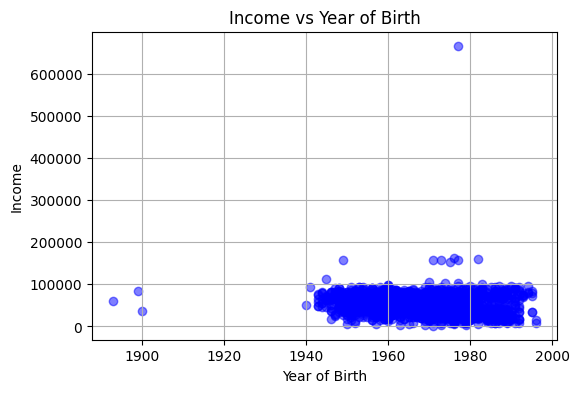

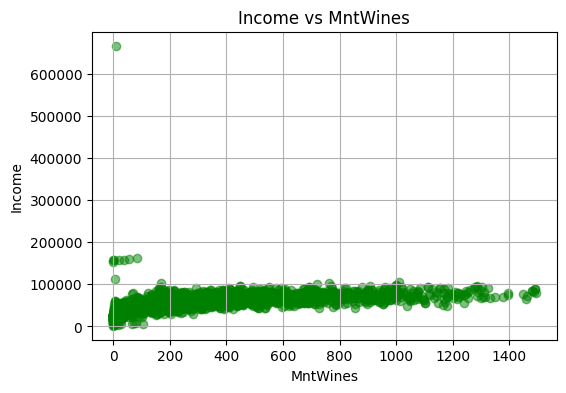

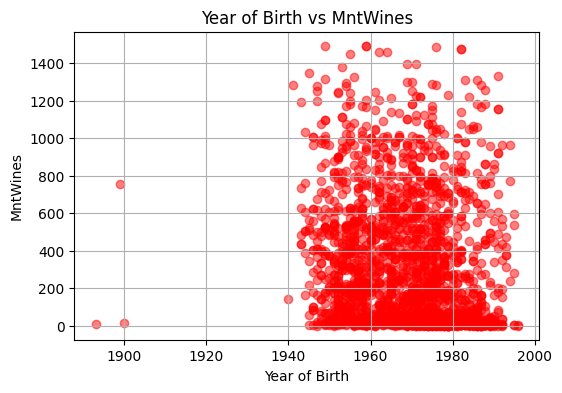

In [37]:
# Biểu đồ phân tán giữa Income và Year_Birth
plt.figure(figsize=(6, 4))
plt.scatter(df_clean['Year_Birth'], df_clean['Income'], color='blue', alpha=0.5)
plt.title('Income vs Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Income')
plt.grid(True)
plt.show()

# Biểu đồ phân tán giữa Income và MntWines
plt.figure(figsize=(6, 4))
plt.scatter(df_clean['MntWines'], df_clean['Income'], color='green', alpha=0.5)
plt.title('Income vs MntWines')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.grid(True)
plt.show()

# Biểu đồ phân tán giữa Year_Birth và MntWines
plt.figure(figsize=(6, 4))
plt.scatter(df_clean['Year_Birth'], df_clean['MntWines'], color='red', alpha=0.5)
plt.title('Year of Birth vs MntWines')
plt.xlabel('Year of Birth')
plt.ylabel('MntWines')
plt.grid(True)
plt.show()


##Ma trận tương quan

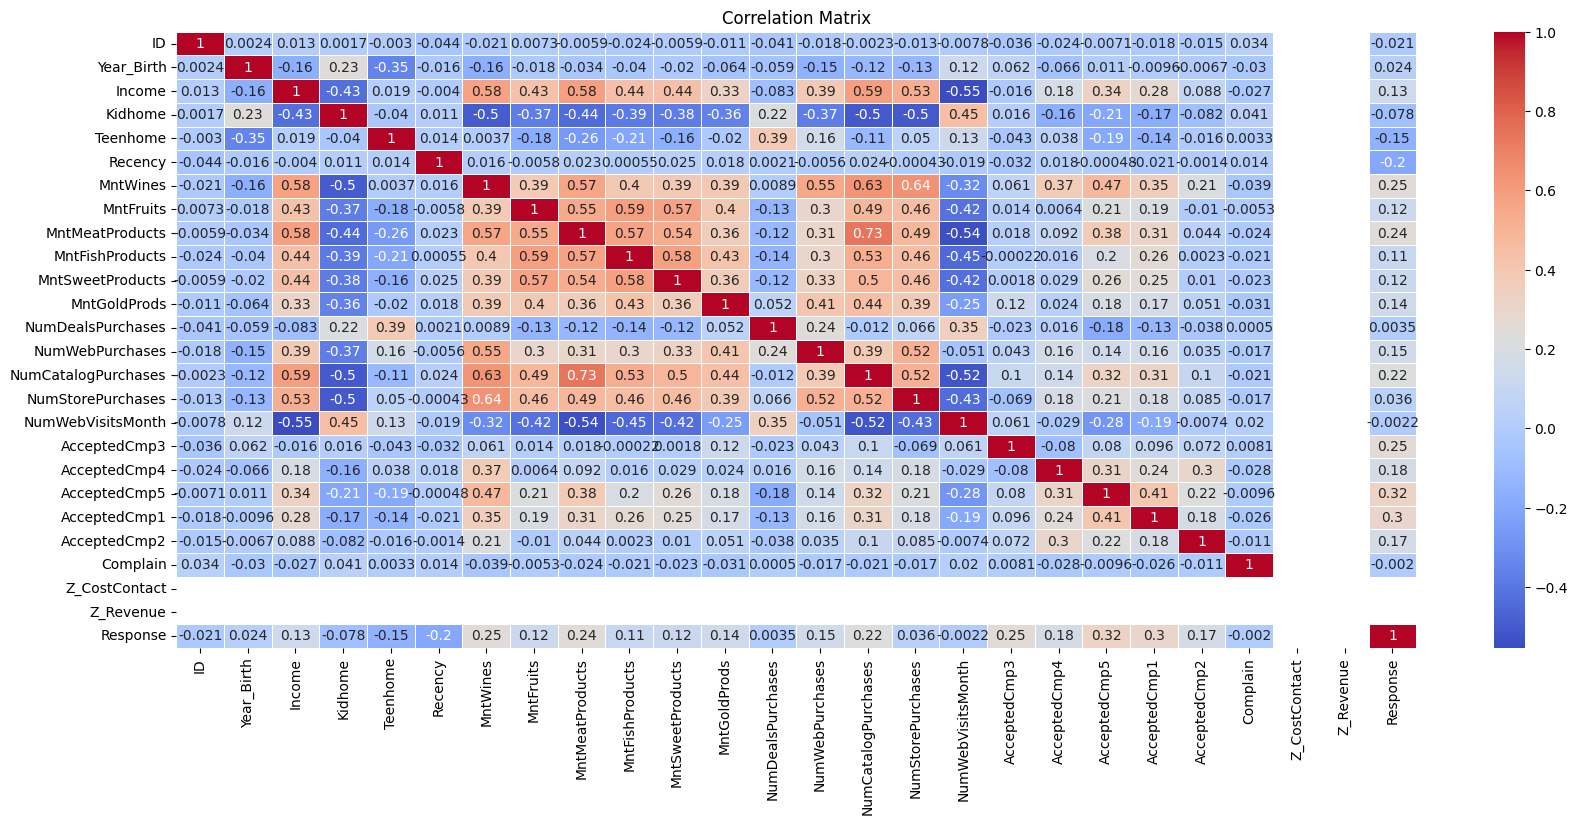

In [38]:
# Loại bỏ các cột phân loại trước khi tính ma trận tương quan
df_numeric = df_clean.select_dtypes(include=[float, int])

# Ma trận tương quan
corr_matrix = df_numeric.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


##Biểu đồ phân loại

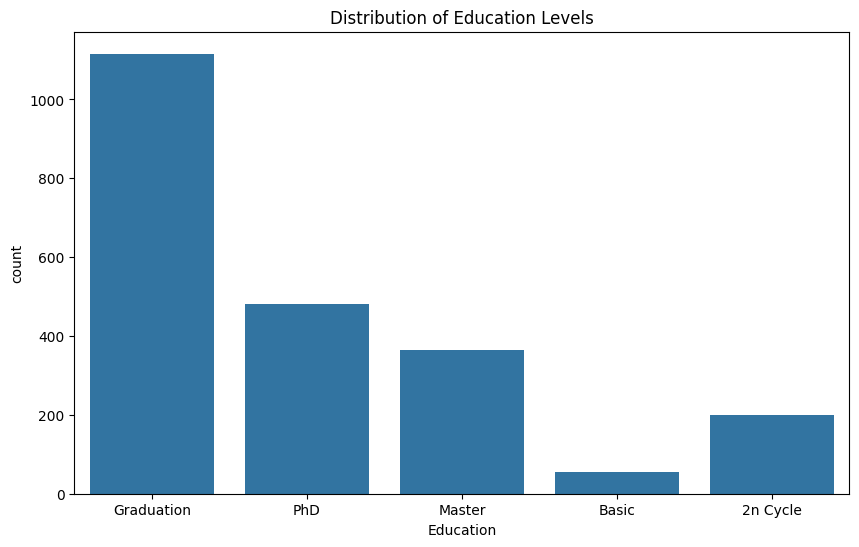

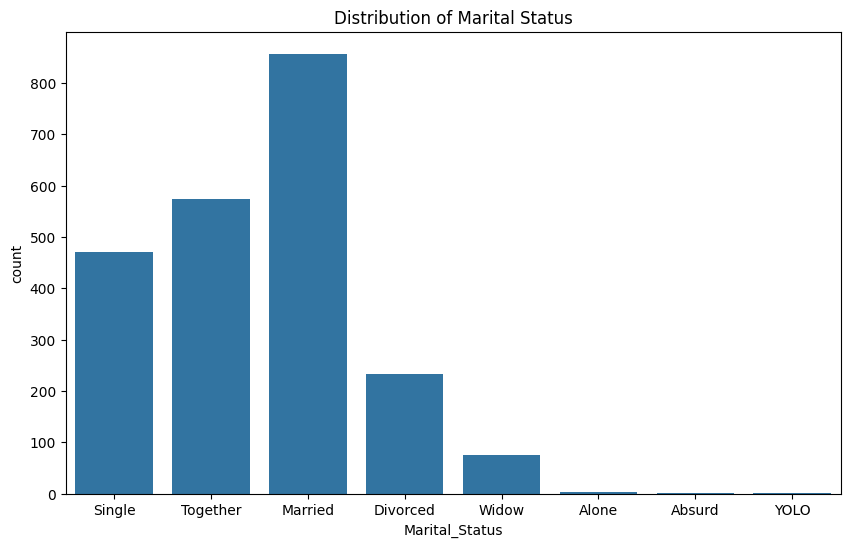

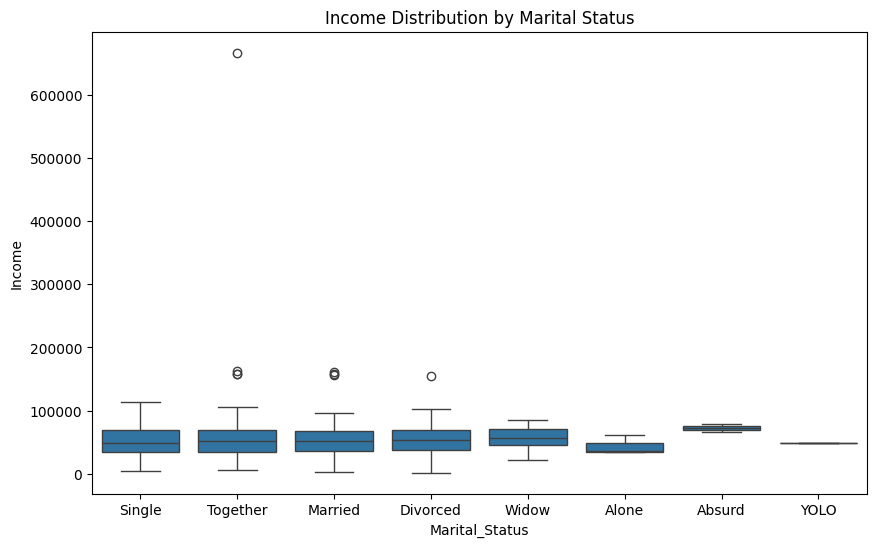

In [39]:
# Biểu đồ phân loại với seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Education')
plt.title('Distribution of Education Levels')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Marital_Status')
plt.title('Distribution of Marital Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Marital_Status', y='Income')
plt.title('Income Distribution by Marital Status')
plt.show()


# **TIỀN XỬ LÝ DỮ LIỆU**

### Xử lý missing values

In [40]:
#To remove the NA values
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


### Thêm biến mới

In [41]:
df['Age'] = 2024 - df['Year_Birth']

print(df["Age"])

# Thêm cột Kids có giá trị bằng tổng giá trị cột Kidhome và Teenhome
df['Kids'] = df['Kidhome'] + df['Teenhome']
# Thêm cột Expenses có giá trị bằng tổng giá trị các cột sản phẩm
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# In ra kết quả của hai cột mới
print("Dữ liệu sau khi thêm cột 'Kids':")
print(df['Kids'])

print("\nDữ liệu sau khi thêm cột 'Expenses':")
print(df['Expenses'])

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2216, dtype: int64
Dữ liệu sau khi thêm cột 'Kids':
0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2216, dtype: int64

Dữ liệu sau khi thêm cột 'Expenses':
0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Expenses, Length: 2216, dtype: int64


### Làm sạch một số biến

In [42]:
# Kiểm tra cột Marital_Status
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [43]:
# Đổi tên các giá trị trong cột
df['Marital_Status'] = df['Marital_Status'].str.replace('Married', 'In relationship')
df['Marital_Status'] = df['Marital_Status'].str.replace('Together', 'In relationship')
df['Marital_Status'] = df['Marital_Status'].str.replace('Divorced', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Widow', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('YOLO', 'Single')

# Mã hóa nhãn (Label Encoding)
df['Marital_Status'] = df['Marital_Status'].map({'In relationship': 1, 'Single': 0})

# Kiểm tra lại các giá trị sau khi thay đổi
df['Marital_Status'].value_counts()


Marital_Status
1    1430
0     786
Name: count, dtype: int64

In [44]:
# Kiểm tra cột Education
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [45]:
# Đổi giá trị '2n Cycle' thành 'Master'
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master')

# Mã hóa nhãn (Label Encoding)
education_mapping = {
    'Graduation': 1,
    'PhD': 2,
    'Master': 3,
    'Basic': 0
}

df['Education'] = df['Education'].map(education_mapping)

# Kiểm tra lại các giá trị sau khi thay đổi
print(df['Education'].value_counts())

Education
1    1116
3     565
2     481
0      54
Name: count, dtype: int64


In [46]:
df.columns   # Kiểm tra các cột hiện có

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Kids', 'Expenses'],
      dtype='object')

In [47]:
# Loại bỏ những cột không sử dụng
df = df.drop(columns=[
       'ID', 'Year_Birth', 'Dt_Customer', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       ])

In [48]:
# Đổi tên lại các cột
df.columns = ['Education', 'Marital_Status', 'Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',  'Age', 'Children', 'Expenses']

print(df)

      Education  Marital_Status   Income  Wines  Fruits  Meat  Fish  Sweet  \
0             1               0  58138.0    635      88   546   172     88   
1             1               0  46344.0     11       1     6     2      1   
2             1               1  71613.0    426      49   127   111     21   
3             1               1  26646.0     11       4    20    10      3   
4             2               1  58293.0    173      43   118    46     27   
...         ...             ...      ...    ...     ...   ...   ...    ...   
2235          1               1  61223.0    709      43   182    42    118   
2236          2               1  64014.0    406       0    30     0      0   
2237          1               0  56981.0    908      48   217    32     12   
2238          3               1  69245.0    428      30   214    80     30   
2239          2               1  52869.0     84       3    61     2      1   

      Gold  Age  Children  Expenses  
0       88   67         0

### Xử lý outliers

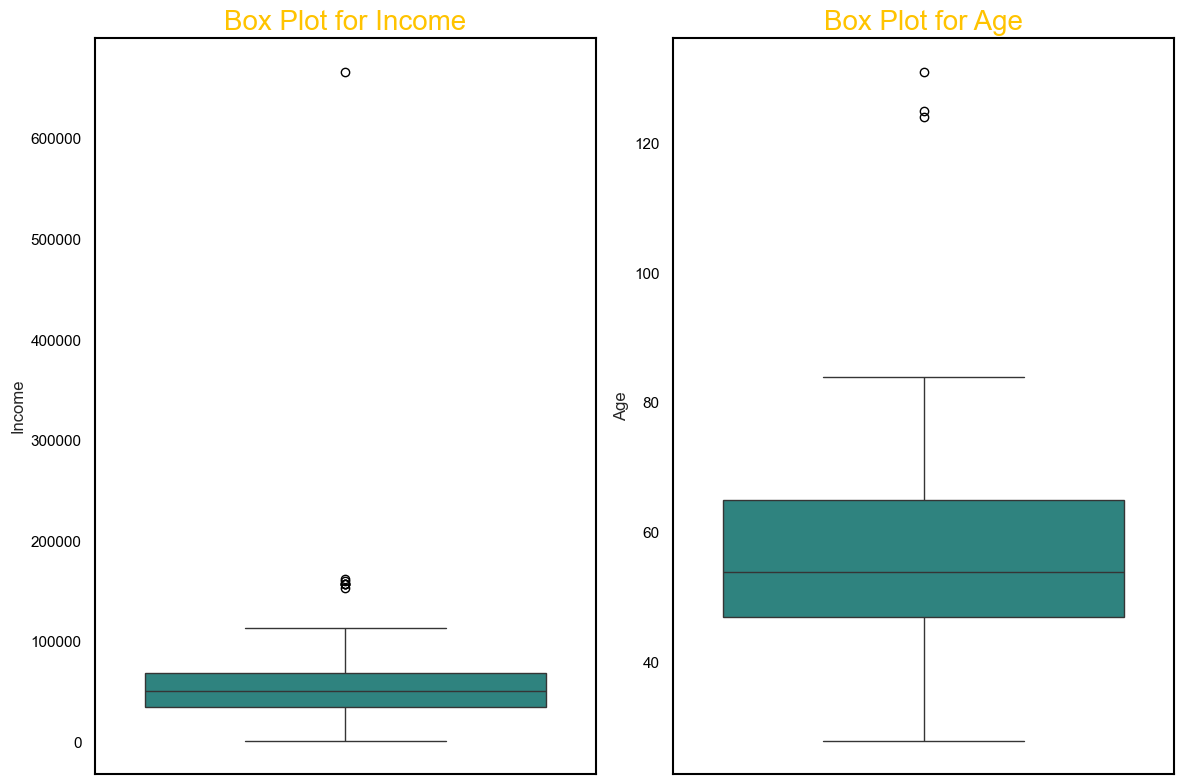

In [49]:
# Đặt nền trắng và không có lưới
sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white', 'axes.grid': False})

# Tạo hình chứa hai trục con (subplots)
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Vẽ biểu đồ hộp (box plot) cho biến 'Income'
sns.boxplot(ax=axes[0], data=df['Income'], palette='viridis', flierprops={'markeredgecolor': 'black'})
axes[0].set_title('Box Plot for Income', color='#FFC300', size=20)
axes[0].tick_params(axis='x', colors='black')
axes[0].tick_params(axis='y', colors='black')

# Vẽ biểu đồ hộp (box plot) cho biến 'Age'
sns.boxplot(ax=axes[1], data=df['Age'], palette='viridis', flierprops={'markeredgecolor': 'black'})
axes[1].set_title('Box Plot for Age', color='#FFC300', size=20)
axes[1].tick_params(axis='x', colors='black')
axes[1].tick_params(axis='y', colors='black')

# Thêm khung bao bên ngoài cho các biểu đồ
for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [50]:
from scipy import stats
import numpy as np

# Tạo một DataFrame mới chỉ chứa các cột cần xét
df_subset = df[['Income', 'Age']]

# Tính toán z-scores cho từng cột trong df_subset
z_scores = np.abs(stats.zscore(df_subset))

# Lọc các hàng có giá trị z-score nằm trong khoảng [-3, 3] cho cả hai cột
filtered_entries = (z_scores < 3).all(axis=1)

# Tạo một DataFrame mới với các hàng đã lọc
df1 = df[filtered_entries]
df1.reset_index(inplace=True, drop=True)

len(df1)


# #Vẽ biểu đồ hộp (box plot) cho biến 'Income' từ dữ liệu df
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
# fig = plt.figure(figsize=(6, 8))
# sns.boxplot(data=df1['Income'], palette='viridis', flierprops={'markeredgecolor': 'white'})
# plt.title('Box Plot for Income', color='#FFC300', size= 20)
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.show()


# #Vẽ biểu đồ hộp (box plot) cho biến 'Income' từ dữ liệu df
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
# fig = plt.figure(figsize=(6, 8))
# sns.boxplot(data=df1['Age'], palette='viridis', flierprops={'markeredgecolor': 'white'})
# plt.title('Box Plot for Age', color='#FFC300', size= 20)
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.show()

2205

In [51]:
# from sklearn.preprocessing import MinMaxScaler

# # Tạo một scaler
# scaler = MinMaxScaler()

# # Scale dữ liệu về khoảng 0-1
# df1_scaled = scaler.fit_transform(df1)

# # Chuyển đổi dữ liệu scaled thành DataFrame
# df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)

# # Kiểm tra kết quả
# df1_scaled.head()

# **MÔ HÌNH PHÂN CỤM**

##Elbow

### K-Means Clustering

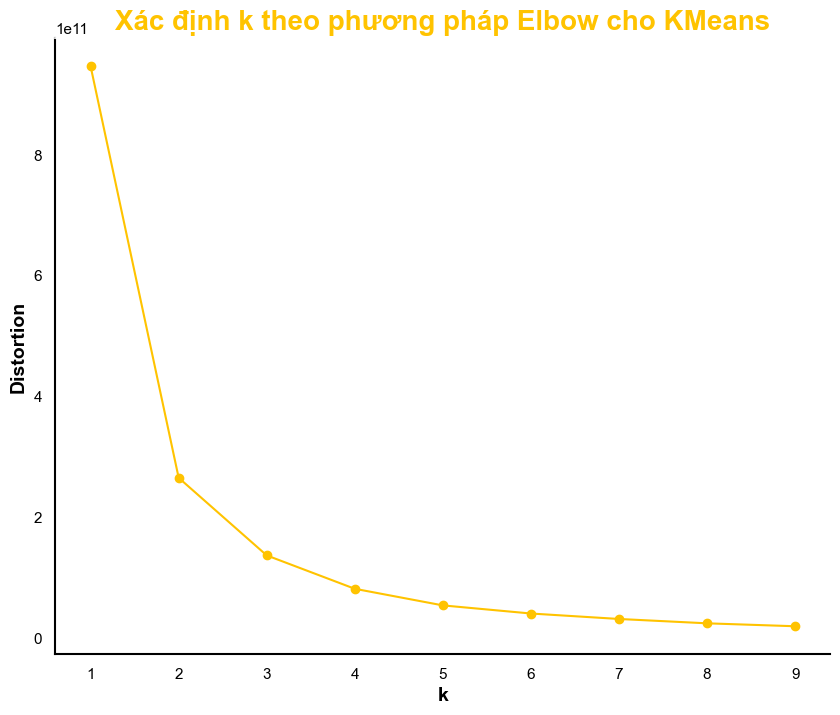

In [52]:
# Elbow method for KMeans
K = range(1, 10)
cost_kmeans = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    cost_kmeans.append(kmeans.inertia_)

# Plotting the elbow for KMeans
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid': True})

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(K, cost_kmeans, 'bo-', color='#FFC300')
plt.xlabel('k', color='black', size=14, fontweight='bold')
plt.ylabel('Distortion', color='black', size=14, fontweight='bold')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.title('Xác định k theo phương pháp Elbow cho KMeans', color='#FFC300', size=20, fontweight='bold')

# Set spines visible and adjust color and linewidth for left and bottom
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

plt.show()


### Hierarchical Clustering

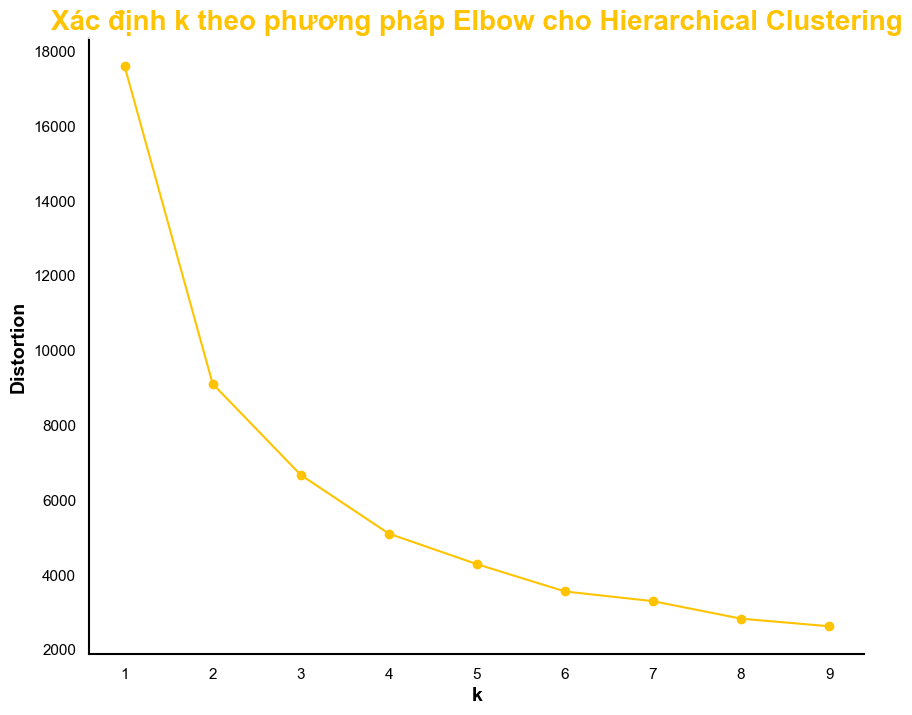

In [53]:
from scipy.spatial.distance import cdist
# Elbow method for Hierarchical Clustering
linkage_matrix = linkage(df1, method='ward')
K = range(1, 10)
cost_hierarchical = []
for k in K:
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    cluster_centers = np.array([df1[clusters == i].mean(axis=0) for i in range(1, k+1)])
    cost_hierarchical.append(np.sum(np.min(cdist(df1, cluster_centers, 'euclidean'), axis=1)) / df1.shape[0])

# Plotting the elbow for Hierarchical Clustering
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(K, cost_hierarchical, 'bo-', color='#FFC300')
plt.xlabel('k', color='black', size=14, fontweight='bold')
plt.ylabel('Distortion', color='black', size=14, fontweight='bold')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.title('Xác định k theo phương pháp Elbow cho Hierarchical Clustering', color='#FFC300', size=20, fontweight='bold')

# Set spines visible and adjust color and linewidth for left and bottom
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

plt.show()

### GMM Clustering

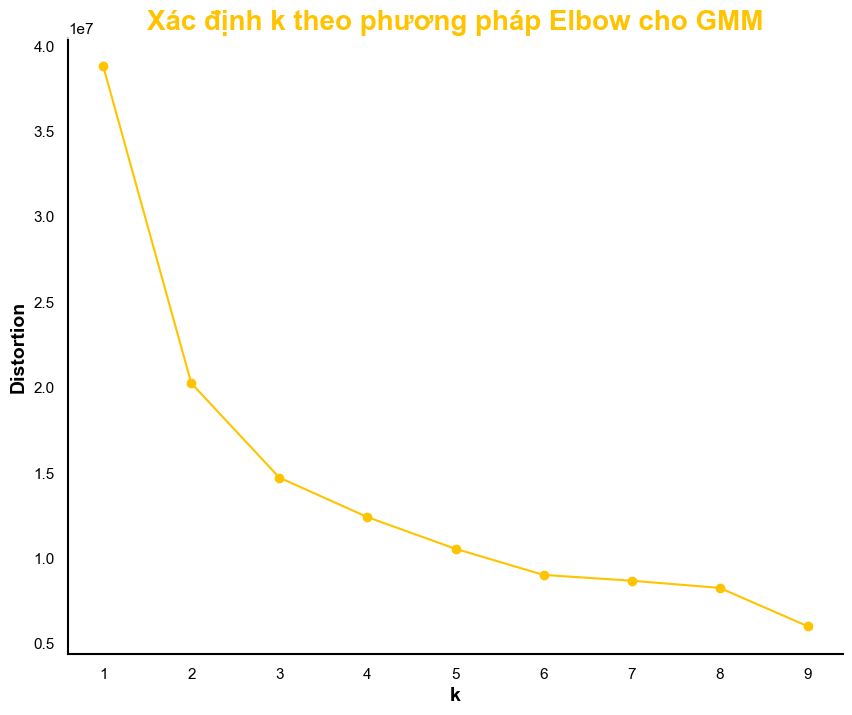

In [54]:
# Elbow method for GMM using WCSS
K = range(1, 10)
cost_gmm = []
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df1)
    labels = gmm.predict(df1)
    wcss = np.sum(np.min(cdist(df1, gmm.means_, 'euclidean'), axis=1))
    cost_gmm.append(wcss)

# Plotting the elbow for GMM
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(K, cost_gmm, 'bo-', color='#FFC300')
plt.xlabel('k', color='black', size=14, fontweight='bold')
plt.ylabel('Distortion', color='black', size=14, fontweight='bold')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.title('Xác định k theo phương pháp Elbow cho GMM', color='#FFC300', size=20, fontweight='bold')

# Set spines visible and adjust color and linewidth for left and bottom
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

plt.show()

##Silhouette score

### K-Means Clustering

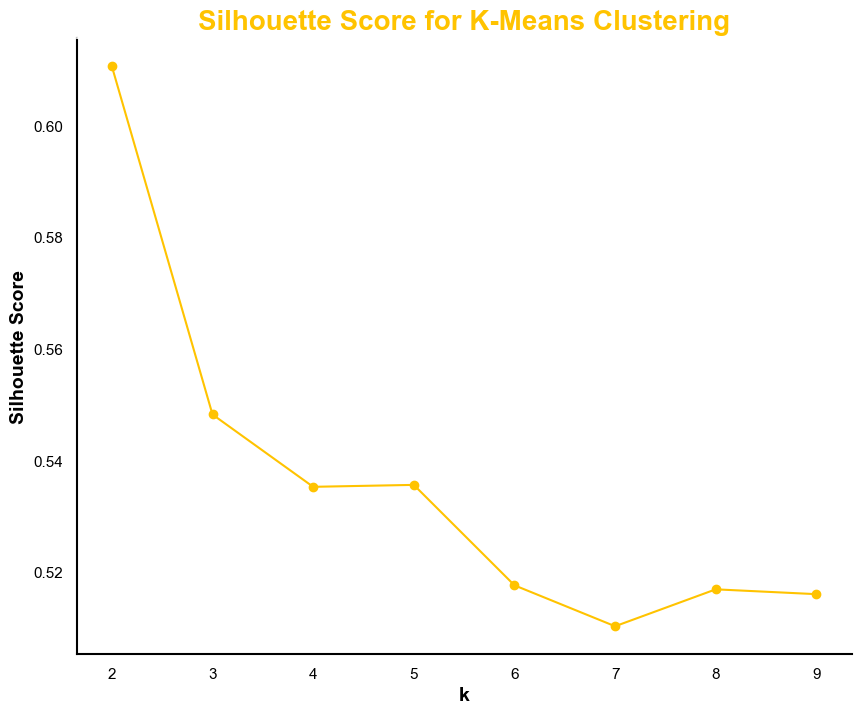

In [55]:
def silhouette_score_kmeans(df, labels):
    return silhouette_score(df, labels)

silhouette_scores_kmeans = []

# Lặp qua các số lượng cụm từ 2 đến 10 cho K-Means
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df1)
    silhouette_avg = silhouette_score_kmeans(df1, clusters)
    silhouette_scores_kmeans.append(silhouette_avg)

# Visualize Silhouette Scores for K-Means
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid': True})

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(K, silhouette_scores_kmeans, 'bo-', color='#FFC300')
plt.xlabel('k', color='black', size=14, fontweight='bold')
plt.ylabel('Silhouette Score', color='black', size=14, fontweight='bold')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.title('Silhouette Score for K-Means Clustering', color='#FFC300', size=20, fontweight='bold')

# Set spines visible and adjust color and linewidth for left and bottom
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

plt.show()

### Hierarchical Clustering

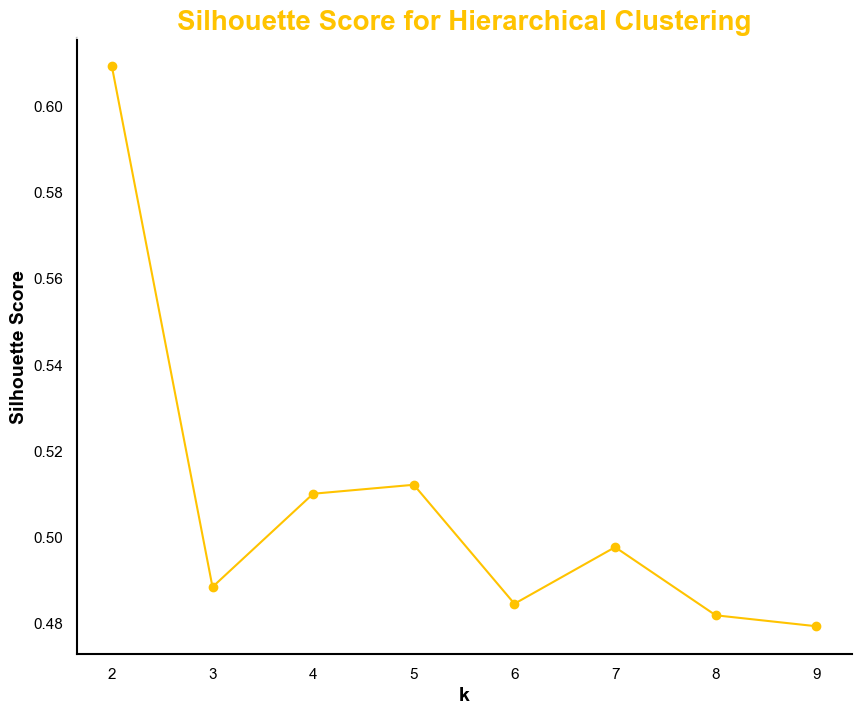

In [56]:
# Range for the number of clusters
K = range(2, 10)

silhouette_scores_hierarchical = []

for k in K:
    hierarchical = linkage(df1, method='ward')
    clusters = fcluster(hierarchical, k, criterion='maxclust')
    silhouette_avg = silhouette_score(df1, clusters)
    silhouette_scores_hierarchical.append(silhouette_avg)

# Visualize Silhouette Scores for Hierarchical Clustering
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid': True})

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(K, silhouette_scores_hierarchical, 'bo-', color='#FFC300')
plt.xlabel('k', color='black', size=14, fontweight='bold')
plt.ylabel('Silhouette Score', color='black', size=14, fontweight='bold')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.title('Silhouette Score for Hierarchical Clustering', color='#FFC300', size=20, fontweight='bold')

# Set spines visible and adjust color and linewidth for left and bottom
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

plt.show()

### GMM Clustering

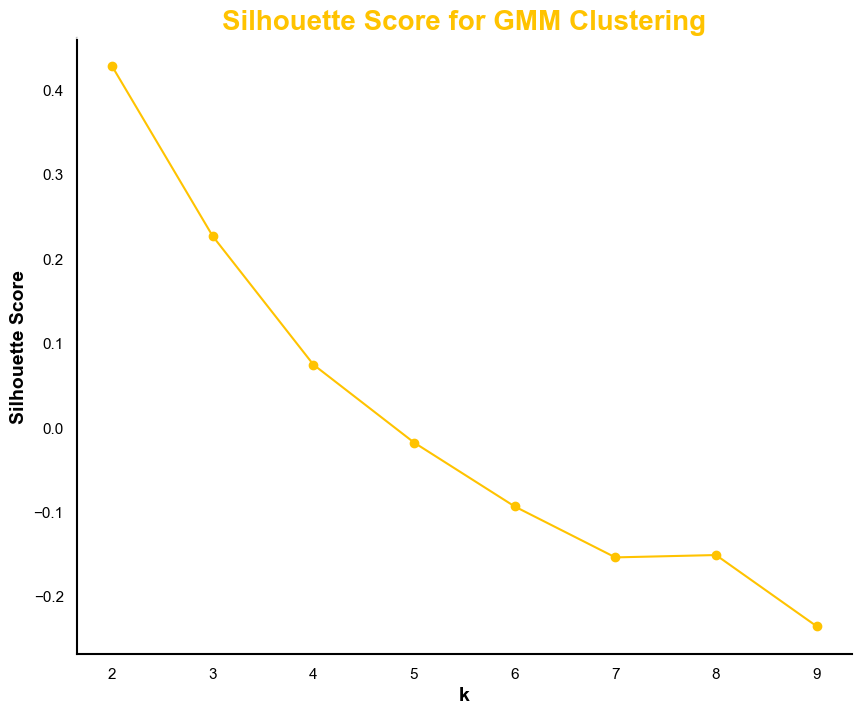

In [57]:
# Range for the number of clusters
K = range(2, 10)

silhouette_scores_gmm = []

for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    clusters = gmm.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, clusters)
    silhouette_scores_gmm.append(silhouette_avg)

# Visualize Silhouette Scores for GMM Clustering
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid': True})

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(K, silhouette_scores_gmm, 'bo-', color='#FFC300')
plt.xlabel('k', color='black', size=14, fontweight='bold')
plt.ylabel('Silhouette Score', color='black', size=14, fontweight='bold')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.title('Silhouette Score for GMM Clustering', color='#FFC300', size=20, fontweight='bold')

# Set spines visible and adjust color and linewidth for left and bottom
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

plt.show()

##Trực quan hóa các cụm

K-Means Scores: Silhouette=0.5353, Davies-Bouldin=0.5498, Calinski-Harabasz=7821.2247
Hierarchical Scores: Silhouette=0.5101, Davies-Bouldin=0.5504, Calinski-Harabasz=7064.1240
GMM Scores: Silhouette=0.2269, Davies-Bouldin=1.1049, Calinski-Harabasz=1817.0540


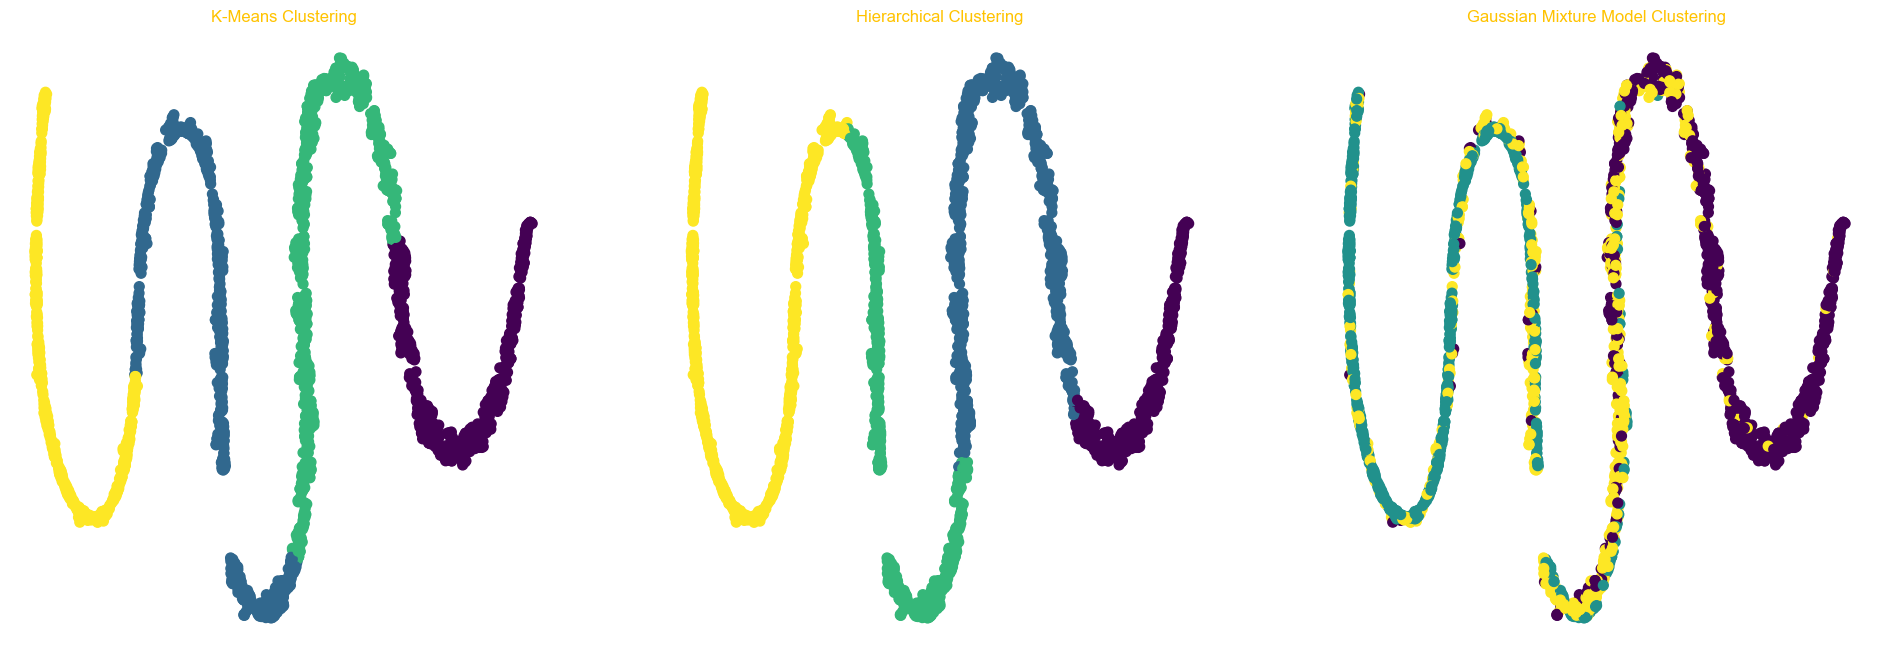

In [58]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(df1)

# Hierarchical Clustering
hierarchical = linkage(df1, method='ward')
hierarchical_clusters = fcluster(hierarchical, 4, criterion='maxclust')

# GMM Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(df1)

# Calculate evaluation metrics
def evaluate_clustering(labels, data):
    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    return silhouette, davies_bouldin, calinski_harabasz

kmeans_scores = evaluate_clustering(kmeans_clusters, df1)
hierarchical_scores = evaluate_clustering(hierarchical_clusters, df1)
gmm_scores = evaluate_clustering(gmm_clusters, df1)

# Print evaluation results
print(f'K-Means Scores: Silhouette={kmeans_scores[0]:.4f}, Davies-Bouldin={kmeans_scores[1]:.4f}, Calinski-Harabasz={kmeans_scores[2]:.4f}')
print(f'Hierarchical Scores: Silhouette={hierarchical_scores[0]:.4f}, Davies-Bouldin={hierarchical_scores[1]:.4f}, Calinski-Harabasz={hierarchical_scores[2]:.4f}')
print(f'GMM Scores: Silhouette={gmm_scores[0]:.4f}, Davies-Bouldin={gmm_scores[1]:.4f}, Calinski-Harabasz={gmm_scores[2]:.4f}')

# Visualize Clustering Results with t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=100, n_iter=5000, random_state=42)
tsne_result = tsne.fit_transform(df1)

df_tsne = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
df_tsne['KMeans'] = kmeans_clusters
df_tsne['Hierarchical'] = hierarchical_clusters
df_tsne['GMM'] = gmm_clusters

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

axes[0].scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_tsne['KMeans'], cmap='viridis', s=50)
axes[0].set_title('K-Means Clustering', color='#FFC300')
axes[1].scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_tsne['Hierarchical'], cmap='viridis', s=50)
axes[1].set_title('Hierarchical Clustering', color='#FFC300')
axes[2].scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_tsne['GMM'], cmap='viridis', s=50)
axes[2].set_title('Gaussian Mixture Model Clustering', color='#FFC300')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [59]:
!pip install umap-learn

##Gộp dữ liệu gốc với các cụm


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans Clustering với k tối ưu là 4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df1)

# Gộp dữ liệu gốc với các cụm
df_clusters = pd.concat([df1, pd.DataFrame({'cluster': clusters})], axis=1)

df_clusters


,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweet,Gold,Age,Children,Expenses,cluster
0,1,0,58138.0,635,88,546,172,88,88,67,0,1617,2
1,1,0,46344.0,11,1,6,2,1,6,70,2,27,1
2,1,1,71613.0,426,49,127,111,21,42,59,0,776,0
3,1,1,26646.0,11,4,20,10,3,5,40,1,53,3
4,2,1,58293.0,173,43,118,46,27,15,43,1,422,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1,1,61223.0,709,43,182,42,118,247,57,1,1341,2
2201,2,1,64014.0,406,0,30,0,0,8,78,3,444,2
2202,1,0,56981.0,908,48,217,32,12,24,43,0,1241,2
2203,3,1,69245.0,428,30,214,80,30,61,68,1,843,2


##Phân tích ý nghĩa cụm

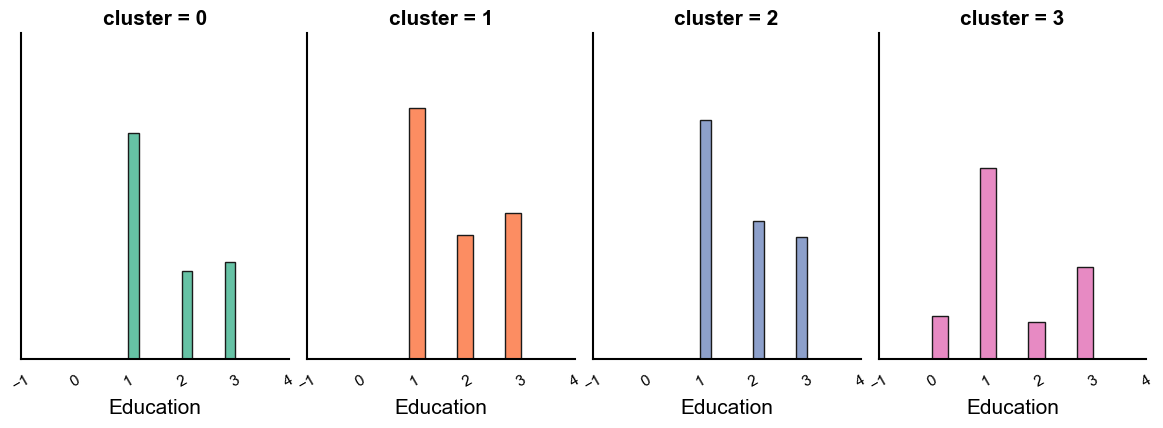

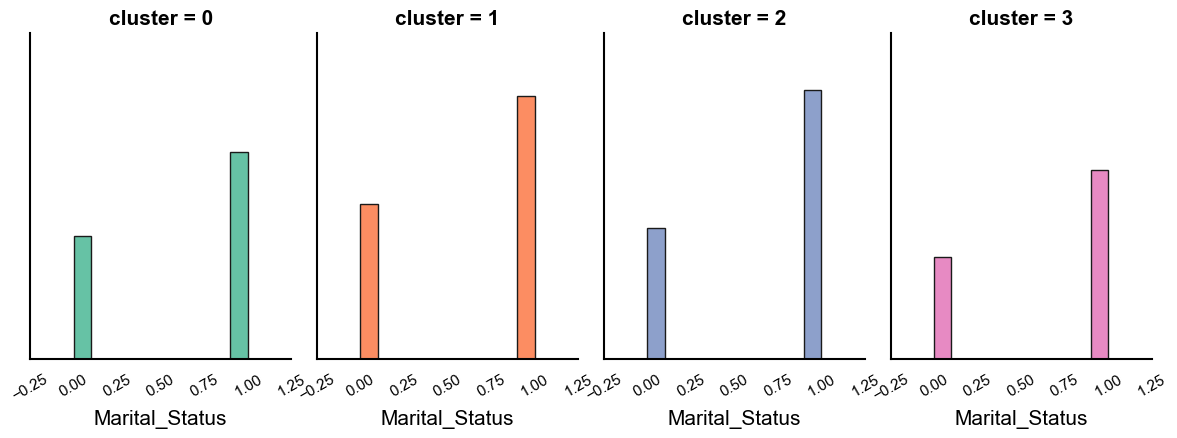

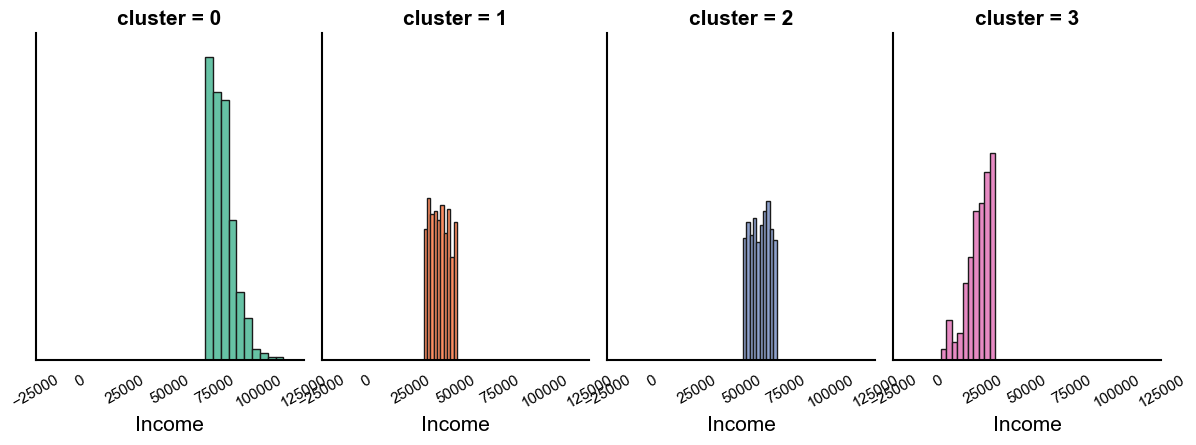

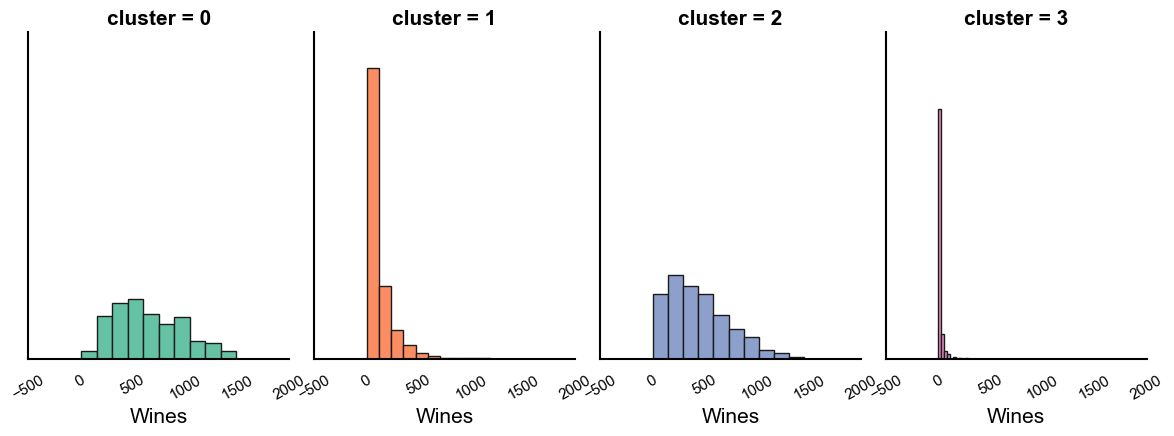

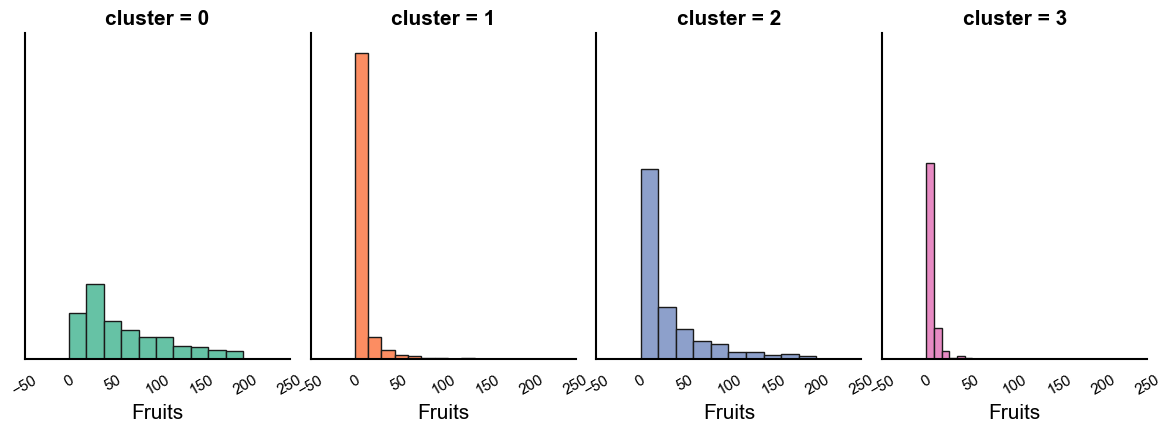

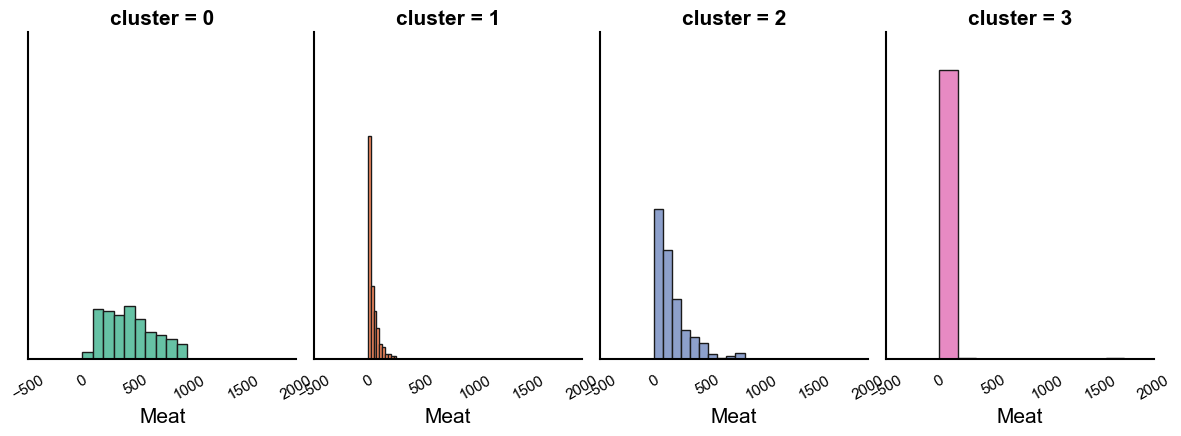

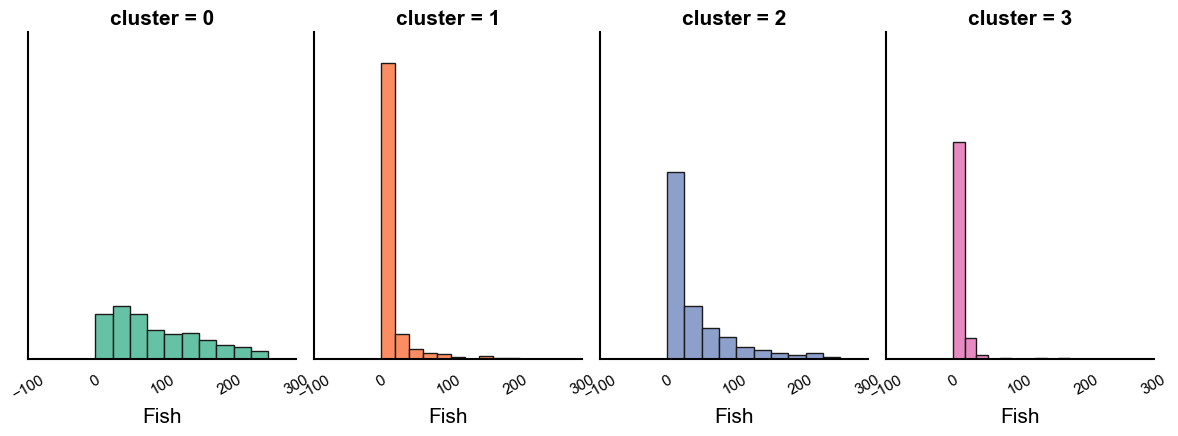

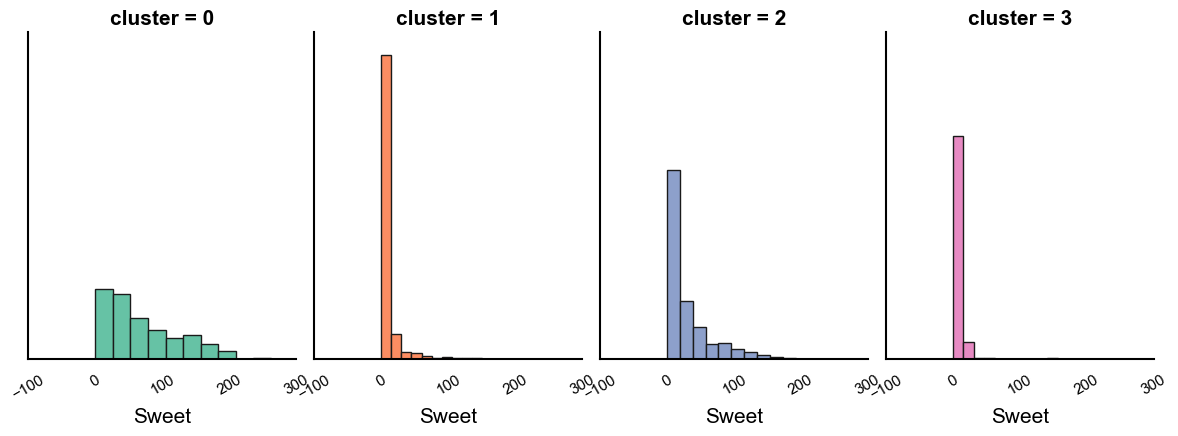

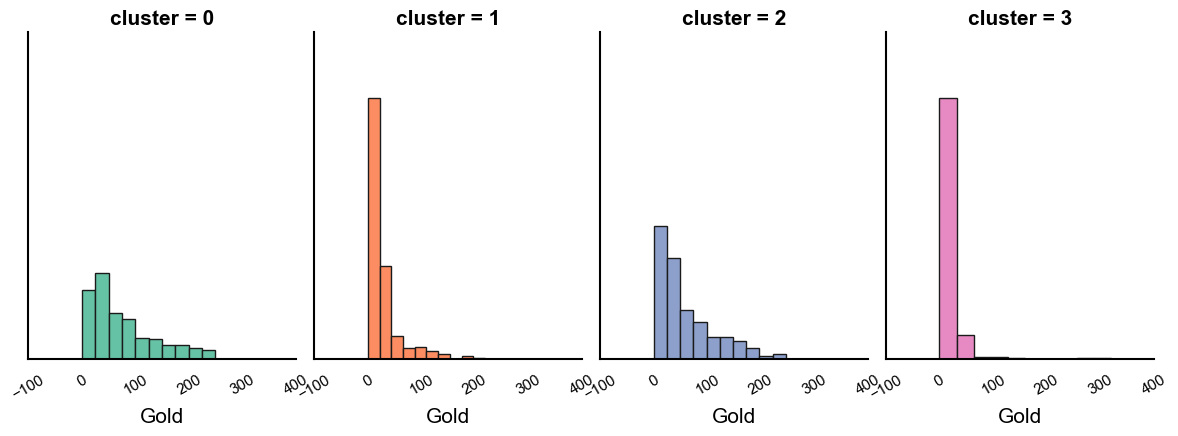

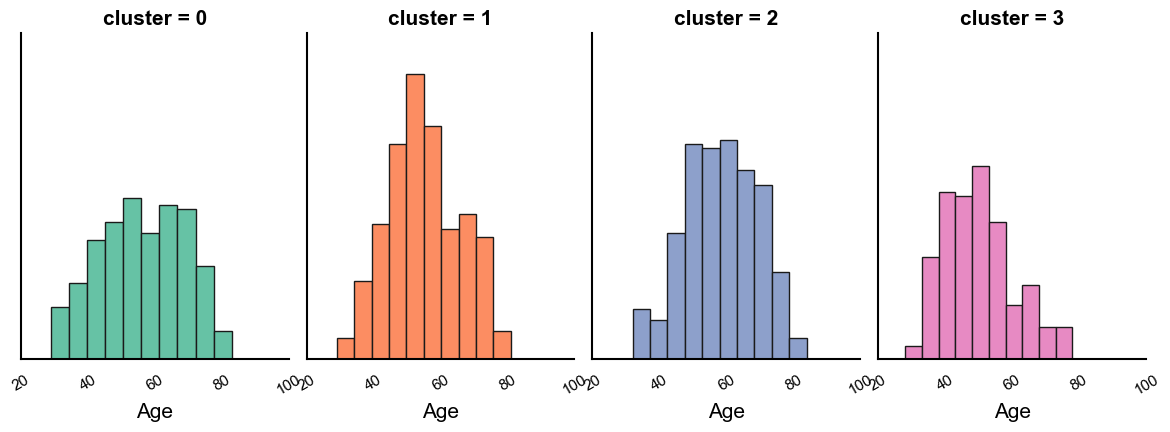

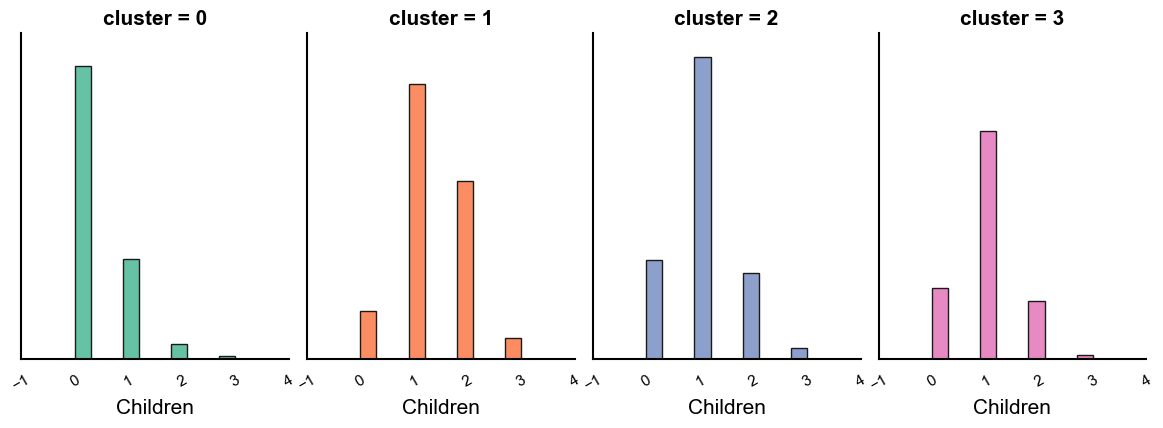

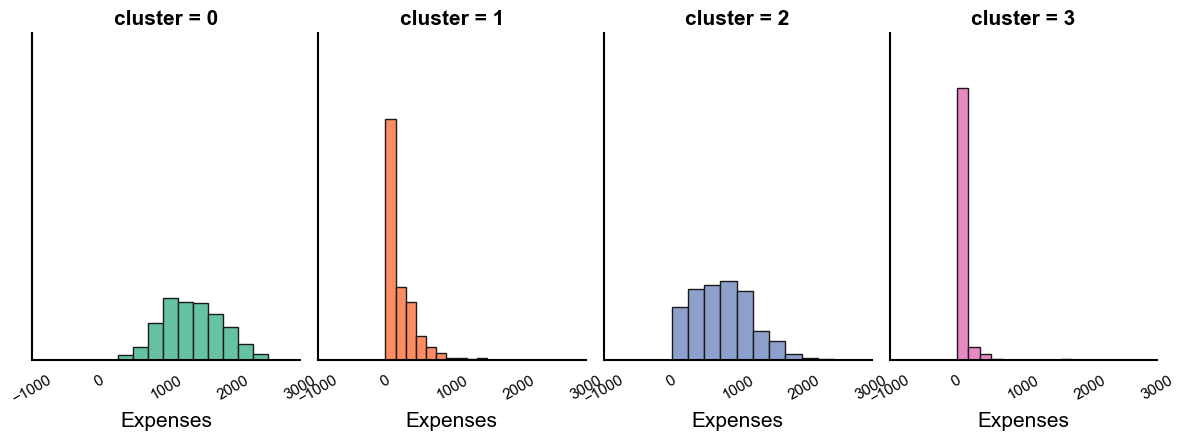

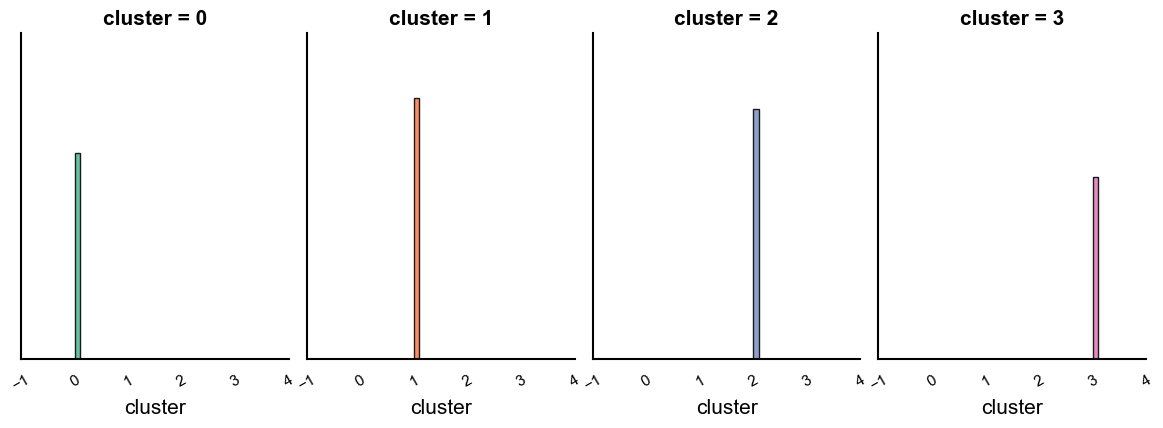

In [61]:
# Giải thích các cụm
sns.set(rc={'axes.facecolor': 'white',
            'figure.facecolor': 'white', 'axes.grid': True})

for col in df_clusters:
    g = sns.FacetGrid(df_clusters, col='cluster',
                      hue='cluster', palette='Set2')
    g.map(plt.hist, col, bins=10, ec='k')
    g.set_xticklabels(rotation=30, color='black')
    g.set_yticklabels(color='black')
    g.set_xlabels(size=15, color='black')
    g.set_titles(size=15, color='black', fontweight='bold')

    # Adjust the spines for each subplot
    for ax in g.axes.flat:
        ax.spines['left'].set_visible(True)
        ax.spines['left'].set_color('black')
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_visible(True)
        ax.spines['bottom'].set_color('black')
        ax.spines['bottom'].set_linewidth(1.5)

    g.fig.set_figheight(5)
    plt.show()


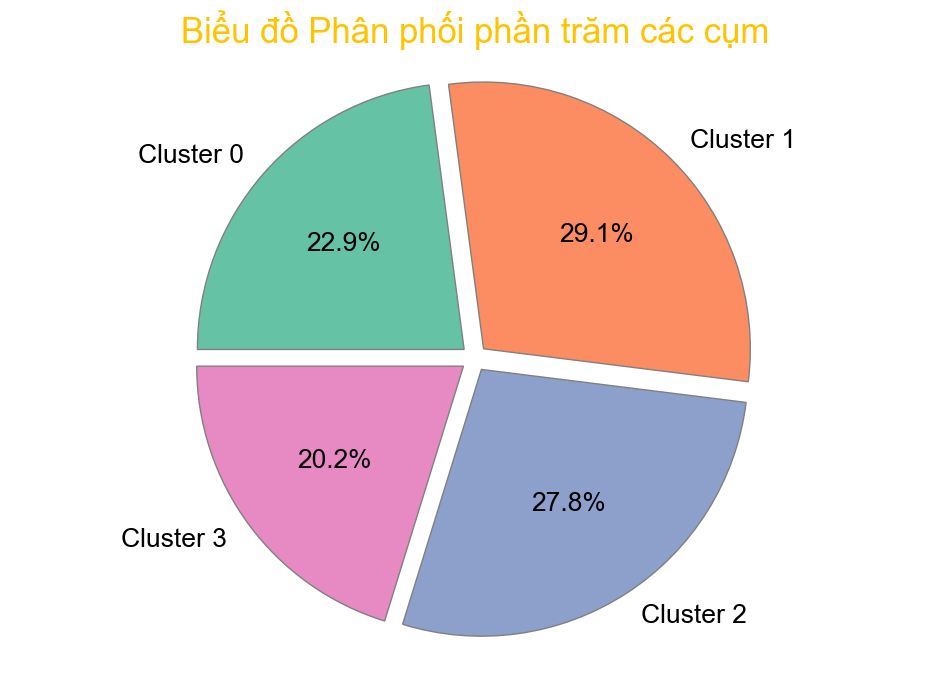

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_clusters is your dataframe with cluster assignments
# Calculate the number of samples in each cluster and store in the variable clusters_count
clusters_count = df_clusters['cluster'].value_counts()

# Convert Series clusters_count to DataFrame and reset index
clusters_count = clusters_count.to_frame().reset_index()

clusters_count.columns = ['clusters', 'count']  # Rename columns
clusters_count = clusters_count.sort_values('clusters', ascending=True)  # Sort data in ascending order

# Define labels for clusters
labels = [f"Cluster {i}" for i in clusters_count['clusters']]

# Visualization
plt.figure(figsize=(12, 8), facecolor='white')
mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:len(clusters_count)]

plt.pie(clusters_count['count'],
        explode=[0.05] * len(clusters_count),
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        textprops=dict(color="black", fontsize=19),
        counterclock=False,
        startangle=180,
        wedgeprops={"edgecolor": "gray", 'linewidth': 1}
        )
plt.axis('equal')

plt.title("Biểu đồ Phân phối phần trăm các cụm", size=25, color="#FFC300")
plt.show()


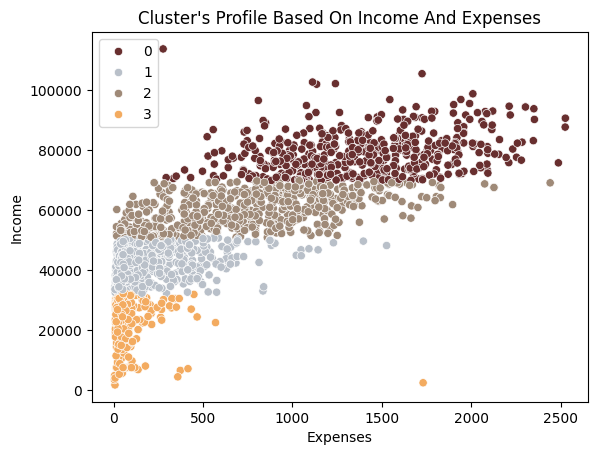

In [63]:
plt.style.use('default')
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(data = df_clusters,x=df_clusters["Expenses"], y=df_clusters["Income"],hue=df_clusters["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Expenses")
plt.legend()
plt.show()

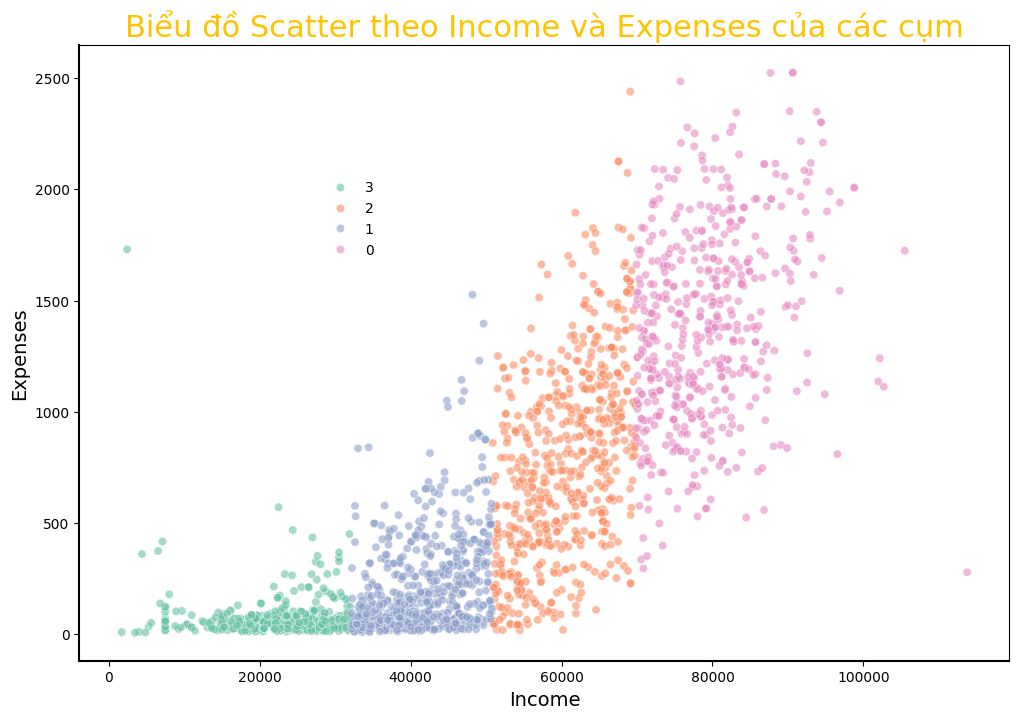

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một bộ dữ liệu mới từ các cột đã chọn trong DataFrame df_clusters
clusters_incomes = df_clusters[['Income', 'Expenses', 'cluster']]           # Chọn các giá trị

# Thêm một biến mới 'group' và gán giá trị từ cột 'cluster'
clusters_incomes['group'] = clusters_incomes['cluster']

# Thay đổi kiểu dữ liệu
clusters_incomes['group'] = clusters_incomes['group'].astype(str)

clusters_incomes = clusters_incomes.sort_values('group', ascending=False)    # sắp xếp dữ liệu

# Trực quan hóa
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data=clusters_incomes, x='Income', y='Expenses', hue='group', palette='Set2', alpha=0.6)

# Đặt tên cho nhãn các trục
plt.xlabel('Income', color='black', size=14)
plt.ylabel('Expenses', color='black', size=14)


ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

plt.tick_params(colors='black')
plt.legend(labelcolor='black', frameon=False, bbox_to_anchor=(0.33, 0.8))

# Tiêu đề
plt.title("Biểu đồ Scatter theo Income và Expenses của các cụm", size=22, color="#FFC300")

# Thiết lập nền trắng cho toàn bộ biểu đồ
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.show()


In [65]:
import pandas as pd
import plotly.express as px

# Tạo một bộ dữ liệu mới
clusters_products = df_clusters[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'cluster']]    # Chọn các biến

clusters_products1 = clusters_products.groupby(['cluster'])
clusters_products2 = clusters_products1.agg({'Wines': 'sum', 'Fruits': 'sum', 'Meat': 'sum', 'Fish': 'sum', 'Sweet': 'sum', 'Gold': 'sum'})

clusters_products3 = clusters_products2.stack().reset_index(name='Count').rename(columns={'level_1': 'Products'})   # phân rã dữ liệu

clusters_products3['group'] = clusters_products3['cluster']
clusters_products3['group'] = clusters_products3['group'].astype(str)


products = clusters_products3.copy()
products = products.assign(ratio=products.groupby('group').Count.transform(lambda x: x / x.sum()))

# Trực quan hóa
fig = px.bar(products, x='group', y='ratio', color='Products',
             labels={
                 "ratio": "Ratio",
                 "group": "Consumer's type"
             },
             color_discrete_map={
                 'Gold': '#FFD700',
                 'Fish': '#87CEEB',
                 'Wines': '#b11226',
                 'Meat': '#f08080',
                 'Sweet': '#FF69B4',
                 'Fruits': 'lightgreen'
             },
             title="Phân bổ các loại sản phẩm theo cụm")

fig.layout.yaxis.tickformat = ',.0%'
fig.update_traces(marker_line_color='white', marker_line_width=1, opacity=0.8)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(
    {'plot_bgcolor': 'white',
     'paper_bgcolor': 'white'
     },
    font=dict(
        family="verdana",
        size=21,
        color="black"
    ),
    width=680,
    height=800,
    title_font_color="#FFC300",
    yaxis_title=None,
    xaxis_title=None
)

fig.show()


In [67]:
import joblib
joblib.dump(kmeans,'model.joblib')

['model.joblib']